In [39]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

In [40]:
poly = pickle.load(open('poly_features.sav', 'rb'))



In [41]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


In [42]:
testing_data = pd.read_csv('../4.Model Testing and Validation/testing_data.csv')
x_test_raw = np.array(testing_data['date_scaled']).reshape(-1, 1)
y_test = np.array(testing_data['rb_win_rate'])

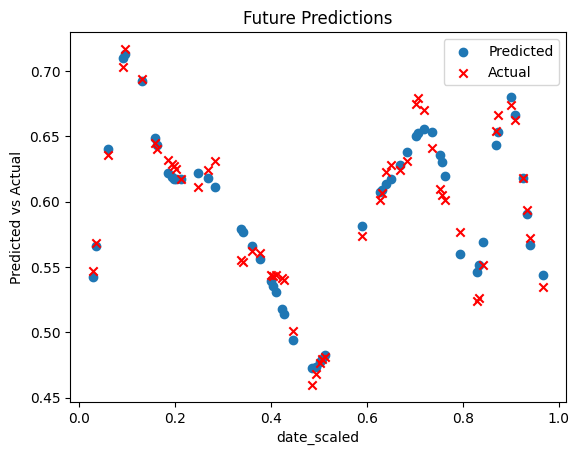

In [43]:
# Apply polynomial transformation to testing data
x_test = poly.transform(x_test_raw)

# Predict and evaluate
y_pred = model_A.predict(x_test)

plt.scatter(x_test_raw, y_pred, label="Predicted")
plt.scatter(x_test_raw, y_test, marker='x', c='r', label="Actual")
plt.title("Future Predictions")
plt.ylabel("Predicted vs Actual")
plt.xlabel("date_scaled")
plt.legend()
plt.show()

In [44]:
# Calculate and print the model's score
test_score = model_A.score(x_test, y_test)
print(f'Testing data score: {test_score}')

Testing data score: 0.9552959106367787


In [45]:
# Create a table of results
table = pd.DataFrame({
    'date_scaled': x_test_raw.flatten(),
    'Actual': y_test,
    'Predicted': y_pred,
    'Loss': y_test - y_pred.round(2)
})
print(table)

    date_scaled    Actual  Predicted      Loss
0      0.196850  0.627295   0.617582  0.007295
1      0.248031  0.611484   0.621705 -0.008516
2      0.511811  0.481020   0.482953  0.001020
3      0.829396  0.523687   0.546437 -0.026313
4      0.872703  0.666062   0.653605  0.016062
5      0.627297  0.601382   0.607374 -0.008618
6      0.502625  0.476528   0.476854 -0.003472
7      0.200787  0.625283   0.617111  0.005283
8      0.649606  0.628078   0.617470  0.008078
9      0.703412  0.674623   0.650134  0.024623
10     0.757218  0.605032   0.630018 -0.024968
11     0.129921  0.693494   0.692590  0.003494
12     0.763780  0.601572   0.619230 -0.018428
13     0.833333  0.526013   0.551687 -0.023987
14     0.734908  0.641059   0.653002 -0.008941
15     0.707349  0.679379   0.652105  0.029379
16     0.185039  0.632038   0.621544  0.012038
17     0.640420  0.622256   0.613295  0.012256
18     0.360892  0.561922   0.566171 -0.008078
19     0.968504  0.534762   0.543429 -0.005238
20     0.1574

In [46]:
# Calculate and print the average loss
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

# Print model details
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

The cost or average loss of this model is -0.00021105017005775556
X Axis intercept: 0.49730213455454386
Coefficient: [-1.12586012e+00  2.12416868e+02 -7.14094696e+03  1.63853376e+05
 -2.43156075e+06  2.30730725e+07 -1.45013766e+08  6.22753692e+08
 -1.85128105e+09  3.75638634e+09 -4.84757306e+09  2.91223314e+09
  1.65806772e+09 -4.40823679e+09  1.86529110e+09  3.14757128e+09
 -5.21595337e+09  3.51309689e+09 -1.19852613e+09  1.70385557e+08]
